In [ ]:
## 05 - Stumps on Real Data

In [3]:
from setup import * #gets the real data

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:33: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,42,44,54,56,64,81,83,85,87,105,107,109,121,123,125,148,150,157,172,174,192,194,210,218,219,221,223,246,247,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,302,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:79: FutureWarning: Downcasting behavior in `replace` is d

       age  education  years_exp  compensation  python  r  sql  Q1_Male  \
587     25       18.0        4.0             0       1  0    1        1   
3065    22       16.0        1.0         10000       1  0    0        1   
8435    22       18.0        1.0             0       1  0    0        1   
3110    40       20.0        3.0        125000       1  0    1        0   
16372   45       12.0        5.0        100000       1  0    1        1   
...    ...        ...        ...           ...     ... ..  ...      ...   
16608   25       16.0        2.0         10000       0  0    1        1   
7325    18       16.0        1.0         30000       1  0    1        1   
21810   18       16.0        2.0             0       0  0    0        1   
4917    25       18.0        1.0        100000       1  0    1        1   
639     25       18.0        1.0         10000       1  0    0        0   

       Q1_Female  Q1_Prefer not to say  Q1_Prefer to self-describe  \
587            0             

In [29]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, dummy, preprocessing
import xgboost as xgb
import dtreeviz
#also, must install graphviz for plotting to work with xgb

In [2]:
stump_dt = tree.DecisionTreeClassifier(max_depth=1) #this is the scikit-learn tree

In [4]:
X_train = kag_pl.fit_transform(kag_X_train)
stump_dt.fit(X_train, kag_y_train)

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:79: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:80: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'r <= 0.5\ngini = 0.496\nsamples = 2110\nvalue = [1153, 957]\nclass = Data Scientist'),
 Text(0.25, 0.25, 'gini = 0.493\nsamples = 1484\nvalue = [653, 831]\nclass = Software Engineer'),
 Text(0.75, 0.25, 'gini = 0.322\nsamples = 626\nvalue = [500.0, 126.0]\nclass = Data Scientist')]

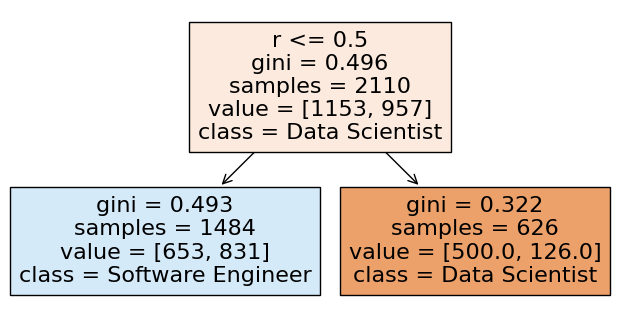

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
features = list(c for c in X_train.columns) #list comprehension written with list() instead of []
tree.plot_tree(stump_dt, feature_names=features, filled=True, class_names=stump_dt.classes_, ax=ax)

In [12]:
X_test = kag_pl.transform(kag_X_test)
stump_dt.score(X_test, kag_y_test)

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:79: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:80: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

0.6243093922651933

In [13]:
dummy_model = dummy.DummyClassifier()
dummy_model.fit(X_train, kag_y_train)
dummy_model.score(X_test, kag_y_test) #this is the percent of values that are 'Data Scientist'. 
#Same as fitting a constant. Always Guess data scientist

0.5458563535911602

**Now with xgboost**

In [27]:
try:
    kag_stump = xgb.XGBClassifier(n_estimators=1, max_depth=1)
    kag_stump.fit(X_train, kag_y_train)
except Exception as e:
    print(e)

## xgboost requires map it to 0-1. won't just do strings automatically for the y-values (and maybe not for x-values too?)

Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['Data Scientist' 'Software Engineer']


In [30]:
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(kag_y_train)
y_test = label_encoder.transform(kag_y_test)
y_test[:5]

array([1, 0, 0, 1, 1])

In [34]:
label_encoder.classes_ #this is why use sklearn preprocessing over pandas. stores this fore later
# the order here says Data Scientist is 0 and Software Engineer is 1
# can also say, Software Engineer is hte positive label.
# can also see as follows
label_encoder.inverse_transform([0,1])
# very cool, tools us 0 is data scientist and 1 is software engineer

array(['Data Scientist', 'Software Engineer'], dtype=object)

In [ ]:
kag_stump = xgb.XGBClassifier(n_estimators=1, max_depth=1)
kag_stump.fit(X_train, y_train)
kag_stump.score(X_test, y_test)

<Axes: >

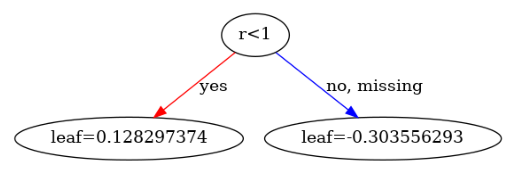

In [38]:
#fig, ax = plt.subplots(figsize=(8,4)) #this doesn't work with it! will add a separate plot. not the xgb tree plot
xgb.plot_tree(kag_stump,num_trees=0)
#ax.set_title('XGBoost stump') this doesn't work with it!

In [39]:
kag_stump.classes_

array([0, 1])

In [40]:
def inv_logit(p):
    return np.exp(p)/(1 + np.exp(p))

In [44]:
inv_logit([.128,-.304]) #53.2% This is the probability of the left node. 
#(For my tree, it has left leaf=.128, right leaf=-.303). Why doesn't it add to 1?

array([0.53195638, 0.42457994])

In [46]:
vals = np.linspace(-7,7)
vals #by default, makes 50 evenly spaced points between (inclusive) the start and stop arguments

array([-7.        , -6.71428571, -6.42857143, -6.14285714, -5.85714286,
       -5.57142857, -5.28571429, -5.        , -4.71428571, -4.42857143,
       -4.14285714, -3.85714286, -3.57142857, -3.28571429, -3.        ,
       -2.71428571, -2.42857143, -2.14285714, -1.85714286, -1.57142857,
       -1.28571429, -1.        , -0.71428571, -0.42857143, -0.14285714,
        0.14285714,  0.42857143,  0.71428571,  1.        ,  1.28571429,
        1.57142857,  1.85714286,  2.14285714,  2.42857143,  2.71428571,
        3.        ,  3.28571429,  3.57142857,  3.85714286,  4.14285714,
        4.42857143,  4.71428571,  5.        ,  5.28571429,  5.57142857,
        5.85714286,  6.14285714,  6.42857143,  6.71428571,  7.        ])

In [47]:
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, s

Text(-3, 0.4, 'Predict Negative')

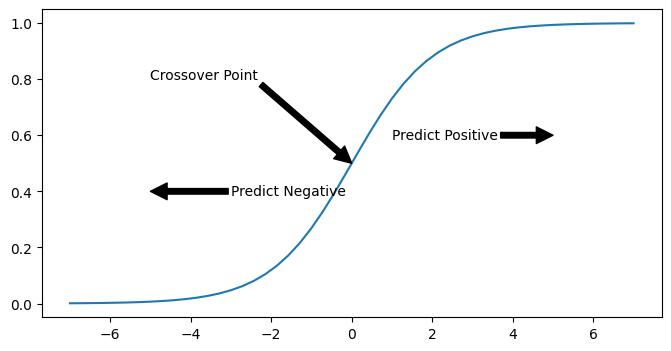

In [52]:
fig, ax = plt.subplots(figsize=(8,4))
vals = np.linspace(-7,7)
ax.plot(vals, inv_logit(vals))
ax.annotate('Crossover Point', (0,.5), (-5,.8), arrowprops={'color':'k'}) 
#the first point is where the arrow points. The second is where the words start for the first one
ax.annotate('Predict Positive', (5,.6), (1,.6),va='center' ,arrowprops={'color':'k'})
ax.annotate('Predict Negative', (-5,.4), (-3,.4),va='center', arrowprops={'color':'k'})
# for these ones, left is where the arrow points, right where the annnotation begins. (non-arrow start)


In [21]:
#dummy_model_res = dummy_model.predict_proba(X_test) - kag_y_test # since they are categorical, 
# i'd have to do more transformatoins to run an f-test. 
# Namely, transform kag_y_test into the correct 1s and 0s
dummy_model.predict_proba(X_test)[:,0] #it's just a constant for all!
# truth is, an F-test for classifiers maybe doesn't really work

array([0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455, 0.5464455,
       0.5464455, 0.5464455, 0.5464455, 0.5464455, 

## Can we compare two regression trees with an f test?